<a href="https://colab.research.google.com/github/anjusree123/Research/blob/main/Sample1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

Defining x and y

In [2]:
x=[[1,2],[3,4],[5,6],[7,8]]
y=[[3],[7],[11],[15]]

Convert the input list to tensor object

In [3]:
X=torch.tensor(x).float()
Y=torch.tensor(y).float()

Register X and Y tod evice cuda if you have a GPU otherwise to a CPU

In [4]:
device='cuda' if torch.cuda.is_available() else 'cpu'
X=X.to(device)
Y=Y.to(device)

Define the neural network

In [5]:
import torch.nn as nn

Define neural network class and the layers
Use forward function for Forward propogation

In [10]:
class MyNeuralNetwork(nn.Module):
  #inititialize all components of the neural network
  def __init__(self):
    super().__init__()
    self.input_layer=nn.Linear(2,8)
    self.hidden_layer=nn.ReLU()
    self.output_layer=nn.Linear(8,1)
    #connect tye components by defining teh forward propogation network
  def forward(self,x):
    x=self.input_layer(x)
    x=self.hidden_layer(x)
    x=self.output_layer(x)
    return x

Assign the network to **device**

In [11]:
mynet=MyNeuralNetwork().to(device)

In [12]:
mynet.input_layer.weight

Parameter containing:
tensor([[-0.4863,  0.0110],
        [-0.0518, -0.2135],
        [ 0.3088, -0.6843],
        [ 0.1726, -0.2607],
        [-0.3061, -0.1949],
        [ 0.1492,  0.5045],
        [ 0.3522, -0.1356],
        [ 0.0373, -0.1709]], requires_grad=True)

In [13]:
mynet.input_layer.bias

Parameter containing:
tensor([-0.1547,  0.5262, -0.3158, -0.0323,  0.2192,  0.1226, -0.1684,  0.5086],
       requires_grad=True)

The values in the output will vary from the preceding, as the neural network is initialized with random values every time. If you wanted them to remain the same in multiple iterations of executing the same code, you would need to specify the seed using the manual_seed method in Torch as torch.manual_seed(0) just before creating the instance of the class object

Obtainibg parameters

In [14]:
mynet.parameters()

<generator object Module.parameters at 0x79d64ef4e0a0>

In [17]:
for par in mynet.parameters():
  print (par)

Parameter containing:
tensor([[-0.4863,  0.0110],
        [-0.0518, -0.2135],
        [ 0.3088, -0.6843],
        [ 0.1726, -0.2607],
        [-0.3061, -0.1949],
        [ 0.1492,  0.5045],
        [ 0.3522, -0.1356],
        [ 0.0373, -0.1709]], requires_grad=True)
Parameter containing:
tensor([-0.1547,  0.5262, -0.3158, -0.0323,  0.2192,  0.1226, -0.1684,  0.5086],
       requires_grad=True)
Parameter containing:
tensor([[ 0.2751, -0.0347,  0.1926, -0.2309,  0.1518,  0.2294,  0.2260, -0.1901]],
       requires_grad=True)
Parameter containing:
tensor([-0.0161], requires_grad=True)


In [6]:
print(nn.Linear(2,7))

Linear(in_features=2, out_features=7, bias=True)


using loss function

In [18]:
loss_funct=nn.MSELoss()

computing loss

In [19]:
Yout=mynet(X)
loss_value=loss_funct(Yout,Y)#while computing loss always pass prediction first
print(loss_value)

tensor(82.5915, grad_fn=<MseLossBackward0>)


Optimizer for reducing the loss value

In [20]:
from torch.optim import SGD
opt=SGD(mynet.parameters(),lr=0.001)#Import the SGD method from the torch.optim module and then pass the neural network object (mynet) and learning rate (lr) as parameters to the SGD method:

performing bacward propogation

In [21]:
opt.zero_grad()#flush the previouse epochs gradient
loss_value=loss_funct(mynet(X),Y)
loss_value.backward()#perform bacward propogation
opt.step()#update weights according to teh gradients computed

Running for 50 epochs

In [31]:
loss_history=[]
opt.zero_grad()

for _ in range(50):

  loss_value=loss_funct(mynet(X),Y)
  loss_value.backward()
  opt.step()
  loss_history.append(loss_value)

Plotting the loss over the increasing epoch

Text(0, 0.5, 'loss_value')

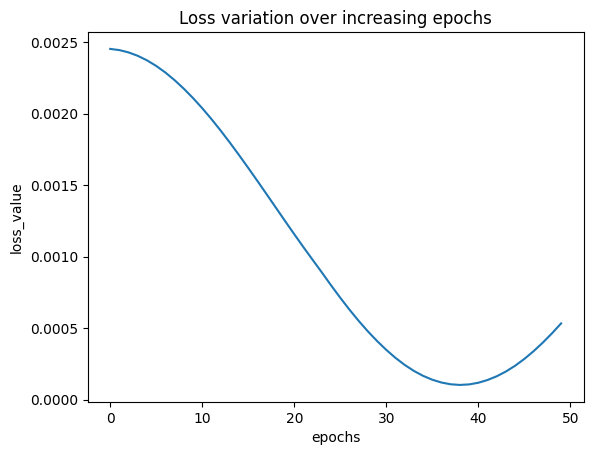

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
los = [fl.item() for fl in loss_history]
plt.plot(los)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss_value')